**Hunton Services is a franchise office of Trane. As such, certain sales quotas for product groups are handed down each year by Trane and are used to determine success of the franchise office. Among these products are Adaptive Frequency Drives (AFDs). Hunton Services wants to determine what the potential replacement value of AFDs is over the next few years. I used our contract equipment base to do this analysis and was able to produce clear results to answer the question.**

In [1]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# bring data into a df and drop columns that may identify customers, salespeople, etc.

dfAFD = pd.read_excel(path,sheet_name="AFD Chillers")
dfAFD.drop(["Wennsoft Serial Number","Manufacturer ID","Equipment Type","Tag","Customer","Location","WS Contract Number",
            "Contract Experation Date","Street","City","State","Zip","Salesperson"],
           axis=1,inplace=True)
dfAFD.head()

,Manuf Yr,Age,Model Number,Model Type,R'Newal,Starter,Display
0,2018,3,CVHF035GA5E0PF0274537E5KBC0000000BA0G070L00000...,CVHF,Future,AFD Unit Mount,UC800
1,2018,3,CVHF035GA5E0PF0274537E5KBC0000000BA0G070L00000...,CVHF,Future,AFD Unit Mount,UC800
2,2017,4,RTHDUD1FXP0UAG2W4RAHG2D2RALAXXQAEXABAXV276B5UT...,RTHD,Future,Premium AFD,UC800
3,2017,4,RTHDUD1FXP0UAG2W4RAHG2D2RALAXXQAEXABAXV276B5UT...,RTHD,Future,Premium AFD,UC800
4,2017,4,RTHDUD1FXP0UAG2W4LAHG2D2LALAXXQAEXABAXV276B5UT...,RTHD,Future,Premium AFD,UC800


This dataframe now shows only the information we need to determine future opportunities for replacement. The best opportunity for replacement for AFDs is in and around the year the unit is 10yrs old. From here, I'll determine when each unit was/will be 10yrs old.

In [4]:
# add column with yr AFD will be/was 10 (manuf yr + 10)

dfAFD["Age 10 Yr"] = dfAFD["Manuf Yr"] + 10

In [5]:
# slim df and groupby by age 10 yr

dfGrouped = dfAFD[["Age 10 Yr","Manuf Yr"]]
dfGrouped = dfGrouped.groupby("Age 10 Yr").count()
dfGrouped.rename(columns={"Manuf Yr":"Units"},inplace=True)
dfGrouped.reset_index(inplace=True)
dfGrouped

,Age 10 Yr,Units
0,2012,4
1,2013,1
2,2014,3
3,2015,3
4,2017,2
5,2018,3
6,2019,2
7,2020,1
8,2021,3
9,2022,4


This information is great. We can easily see how many opportunities we'll have in the coming years. To help non-technical users better understand the data, I'll create a basic visualization to show this info.

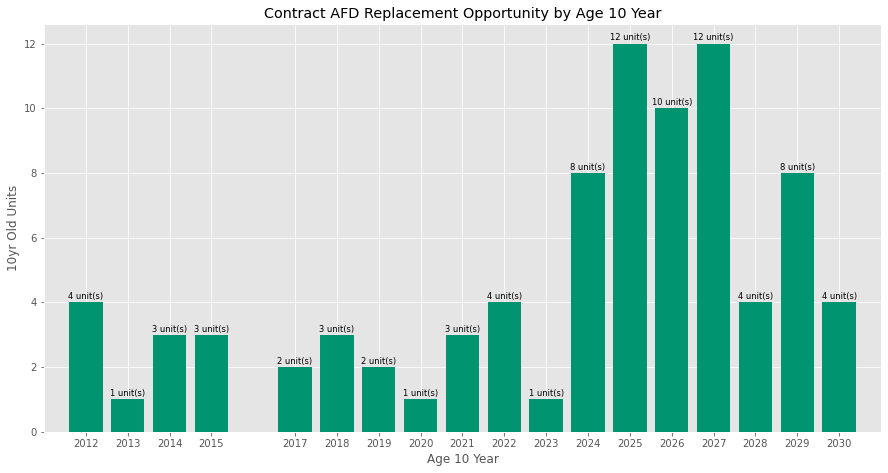

In [6]:
# visualize by age 10 year

plt.figure(figsize=(15,7.5))
plt.style.use("ggplot")

plt.bar("Age 10 Yr",height="Units",data=dfGrouped,color="#009570")
plt.xticks(dfGrouped["Age 10 Yr"].values)
plt.xlim(2011,2031)
plt.title("Contract AFD Replacement Opportunity by Age 10 Year")
plt.xlabel("Age 10 Year",fontsize=12)
plt.ylabel("10yr Old Units",fontsize=12)
for x, y in zip(dfGrouped["Age 10 Yr"],dfGrouped["Units"]):
    plt.text(x=x,y=y+.1,s=f"{y} unit(s)",size="small",ha="center")

plt.show()

**Conclusion: We have a good number of AFDs under contract and the majority are fairly new. Some that are older than 10yrs today have either been replaced or we're in talks to do so. The focus moving forward should be on getting more equipment with older AFDs under contract. This will help us "speed up time," so to speak, and get some replacements before the big years of 2024-2027. Long-term, we'll have more and more of these opportunities as AFDs are becoming increasingly common on new equipment from the factory.**

**This notebook was created with actual equipment data and is currently helping our sales and operations teams prioritize which customers/equipment they focus on when looking to expand our customer base.**